# 1. 导入模块

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. 生成数据集

In [4]:
from sklearn import datasets
X1, y1 = datasets.make_circles(n_samples = 1500, factor = 0.5, noise = 0.05, random_state = 32)
X2, y2 = datasets.make_moons(n_samples = 1500, noise = 0.05, random_state = 32)

In [5]:
colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])

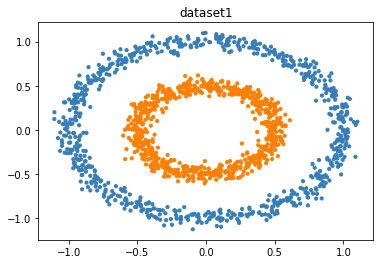

In [6]:
plt.title('dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, c = colors[y1])

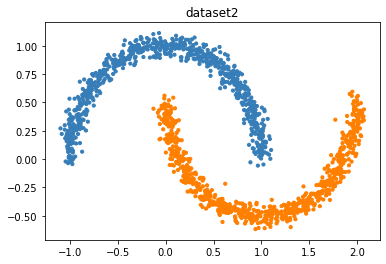

In [7]:
plt.title('dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s = 10, c = colors[y2])

# 3. 导入模型

# 第一题：使用sklearn的DBSCAN和GaussianMixture完成聚类

实验内容：
1. 使用sklearn的DBSCAN和GaussianMixture在两个数据集上完成聚类任务
2. 对聚类结果可视化
3. 对比外部指标FMI和NMI
4. 选做：调整密度聚类的eps参数，绘制聚类结果

**注意：在运行本notebook前请将sklearn更新至最新版！**

我们导入密度聚类和高斯混合模型两个模型

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# 4. 训练模型

In [9]:
dbscan = DBSCAN(eps = 0.1)
dbscan.fit(X1)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

密度聚类模型使用模型的`labels_`属性就可以获得聚类后的类标记

In [10]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [11]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X1)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

高斯混合模型需要使用predict函数预测类标记

In [12]:
gmm.predict(X1)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# 5. 聚类结果可视化

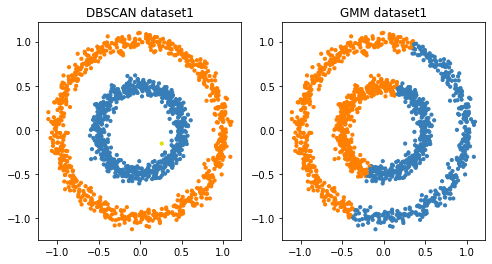

In [13]:
plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.title('DBSCAN dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, c = colors[dbscan.labels_])

plt.subplot(122)
plt.title('GMM dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, c = colors[gmm.predict(X1)])

从可视化效果可以看出，密度聚类比高斯混合聚类在**这个数据集**上表现的更好一些

## 6. 指标计算

我们这里选用两个外部指标，FMI和NMI。

互信息(mutual information)表示了两个分布的一致程度。归一化的互信息(NMI)将互信息值映射到0到1的空间内。值越高，说明两个分布的一致性越高。

FMI是Fowlkes-Mallows index，使用precision和recall计算得到，其值域也是0到1，越大说明聚类效果越和参考模型相近。

In [14]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score

In [15]:
normalized_mutual_info_score(y1, dbscan.labels_)

0.9963492171846003

In [16]:
normalized_mutual_info_score(y1, gmm.predict(X1))

2.0521603760066145e-05

In [17]:
fowlkes_mallows_score(y1, dbscan.labels_)

0.9993331109628394

In [18]:
fowlkes_mallows_score(y1, gmm.predict(X1))

0.49937520329081986

从外部指标上看，密度聚类在这个数据集上比高斯混合模型更好。

# Test

请你使用密度聚类和高斯混合模型在数据集X2上进行聚类，绘制聚类后的效果。计算FMI和NMI值，填入下标

###### 双击此处填写

算法|FMI|NMI
-|-|-
密度聚类|0.9986675591186284|0.9933830644666388
高斯混合模型|0.7474721941402278|0.3951934639969314

In [19]:
# YOUR CODE HERE
dbscan = DBSCAN(eps = 0.1)
dbscan.fit(X2)

In [ ]:
dbscan.labels_

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X2)

In [ ]:
gmm.predict(X2)

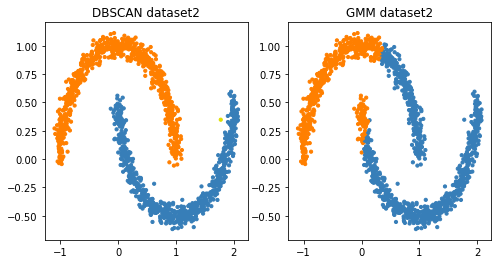

In [20]:
plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.title('DBSCAN dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s = 10, c = colors[dbscan.labels_])

plt.subplot(122)
plt.title('GMM dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s = 10, c = colors[gmm.predict(X2)])

In [25]:
normalized_mutual_info_score(y2, dbscan.labels_)

0.9963492171846003

In [26]:
normalized_mutual_info_score(y2, gmm.predict(X2))

0.21909051564363885

In [27]:
fowlkes_mallows_score(y2, dbscan.labels_)

0.9993331109628394

In [28]:
fowlkes_mallows_score(y2, gmm.predict(X2))

0.6405281412617653

由此可看出：

# 选做：尝试调整密度聚类的eps的值，绘制聚类结果

In [35]:
# YOUR CODE HERE
